# Bilder

In diesem Notebook geht es darum, wie man mithilfe von OpenCV und Numpy Bilder lädt, anzeigt, speichert und Operationen darauf ausführt.

In [1]:
import cv2 as cv   # importieren der OpenCV Bibliothek
import numpy as np # importieren der Numpy Bibliothek

# importieren von Bibliotheken zur Darstellung von Bildern
import ipywidgets as widgets
from matplotlib import pyplot as plt

### Bilder Laden

Bilder werden in OpenCV über die Funktion [imread](https://docs.opencv.org/4.5.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) geladen.
Die Flags `cv.IMREAD_COLOR` und `cv.IMREAD_GRAYSCALE` geben an, ob das Bild mit den drei Farbwerten rot, grün, blau oder als Grauwertbild geladen wird.

In [2]:
img_color = cv.imread('../resources/fh.jpg', cv.IMREAD_COLOR)
img_grayscale = cv.imread('../resources/fh.jpg', cv.IMREAD_GRAYSCALE)

#### Dimensionen

Dementsprechend fallen auch die Dimension der erstellten Matrizen unterschiedlich aus. Bei dem Grauwertbild sind die Dimensionen `(Höhe, Breite)`, beim Farbbild `(Höhe, Breite, Kanäle)`:

In [3]:
print(f'Dimensionen Farbbild {img_color.shape}')
print(f'Dimensionen Grauwertbild {img_grayscale.shape}')

Dimensionen Farbbild (600, 800, 3)
Dimensionen Grauwertbild (600, 800)


#### Zugriff auf Pixel

Das zeigt auch der Zugriff auf einzelne Pixel der Bilder. Während das Ergebnis des Zugriffs auf den Pixel $P_{0, 0}$ des Grauwertbilds ein einzelner Intensitätswert ist, bekommt man beim Farbbild gleich drei Werte - einen für jeden Farbkanal:

In [4]:
print(img_grayscale[0, 0])
print(img_color[0, 0])

203
[221 200 202]


#### Datentype Besonderheiten

Pixel können Intensitätswerte von 0 bis 255 annehmen (intern werden sie als Byte repräsentiert). Dementsprechend muss man aufpassen, wenn man größere oder kleinere Werte zuweist. Darauf muss man insbesondere achten, wenn man einen Pixelwert aus mehreren anderen berechnet.

In [5]:
img_grayscale[0, 0] = 256
print(f'256 != {img_grayscale[0, 0]}')
img_grayscale[0, 0] = -53
print(f'-53 != {img_grayscale[0, 0]}')

256 != 0
-53 != 203


### Darstellen von Bildern

Mithilfe der Bibliothek `matplotlib`lassen sich Bilder direkt im jupyter notebook darstellen.

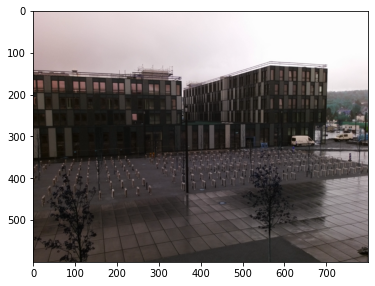

In [6]:
# Zeile die matplotlib angibt, wie das Bild im jupyter notebook dargestellt werden soll
%matplotlib inline

fig = plt.figure(figsize=(6, 6)) # Einstellung wie groß das Bild dargestellt werden soll
_ = plt.imshow(img_color) # Darstellen des Bildes

#### Farbbilder

**Wichtig**: Aus historischen Gründen sind die Farbkanäle in OpenCV in der Reihenfolge BGR (blau, grün, rot) und nicht in der Reihenfolge RGB angeordnet.
`matplotlib` erwartet aber die Reihenfolge RGB, was wie man oben sieht zu einer falschen darstellung der Farben führt (der Himmel ist rötlich statt bläulich).
Mit der Funktion [cvtColor](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) kann zwischen den beiden Reihenfolgen transformiert werden.

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) # subplots um 2 Bilder nebeneinander darstellen zu können
_ = axs[0].imshow(img_color)
_ = axs[0].set_title('BGR')
_ = axs[1].imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
_ = axs[1].set_title('RGB')

#### Grauwertbilder

`matplotlib` wendet bei skalaren Bildern automatisch ein Farbmapping an (siehe [imshow](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html)).
Das ist sinnvoll, wenn man Daten zweidimensional darstellen möchte, aber nicht bei Grauwertbildern.
Dort muss für eine richtige Darstellung der Parameter `cmap='gray'` gesetzt werden.

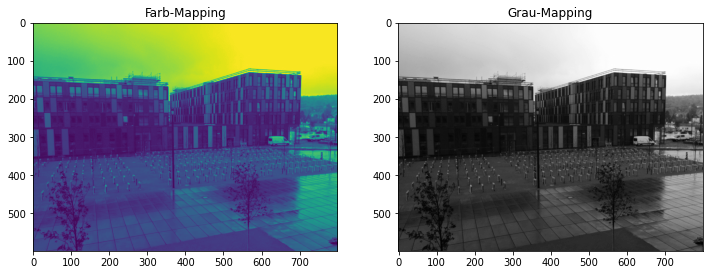

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
_ = axs[0].imshow(img_grayscale)
_ = axs[0].set_title('Farb-Mapping')
_ = axs[1].imshow(img_grayscale, cmap='gray')
_ = axs[1].set_title('Grau-Mapping')

#### Interaktion

Es ist nicht nur möglich Bilder darzustellen, sondern auch damit zu interagieren.
Im unteren Code wird der Farbwert eines Pixels ausgeben, wenn mit der Maus darauf geklickt wird.

<IPython.core.display.Javascript object>


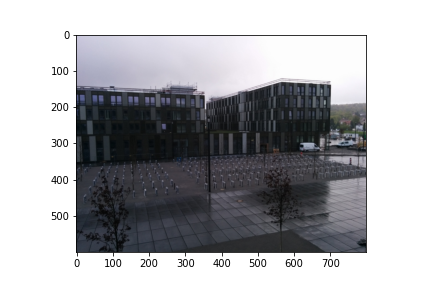

Output()

In [13]:
# für Interaktionen ist es wichtig hier notebook statt inline (s.o) zu verwenden
%matplotlib notebook

# das erstellen eines output widgests ist wichtig, da darauf der Text ausgegeben wird
out = widgets.Output()

# erstelle eine Funktion, die Aufgerufen wird, wenn mit der Maus geklickt wird
@out.capture()
def onclick(event):
    x, y = round(event.xdata), round(event.ydata)
    print(f'Pixel {(x, y)} hat die BGR-Intensitäten {img_color[y, x]}')

# registriere die Funktion als Handler für Maus-Events
fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Anzeigen des Bildes
_ = plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.show()

# Anzeigen des ausgegebenen Textes unter dem Bild
display(out)

#### Videos

Mit OpenCV ist es auch möglich Videos zu laden und zu bearbeiten. Dabei wird vom Video ein Bild (Frame) nach dem anderen geladen:

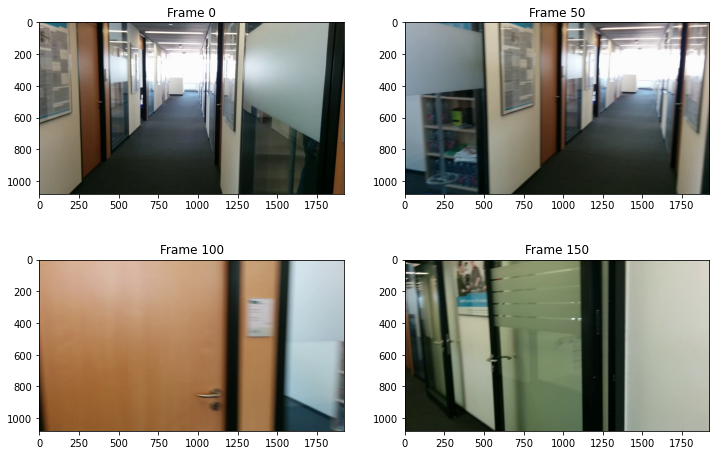

In [10]:
%matplotlib inline

capt = cv.VideoCapture('../resources/flur.mp4')

# validiere das Video geladen werden konnte
if not capt.isOpened():
    print('Cannot open video!')

# lade die ersten 150 Frames und speichere jedes 50-zigste
frames = {}
for i in range(50 * 3 + 1):
    frame_read, frame = capt.read()
    if not frame_read:
        break
        
    if i % 50 == 0:
        frames[i] = frame

# anzeigen der frames
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
_ = axs[0, 0].imshow(cv.cvtColor(frames[0], cv.COLOR_BGR2RGB))
_ = axs[0, 0].set_title('Frame 0')
_ = axs[0, 1].imshow(cv.cvtColor(frames[50], cv.COLOR_BGR2RGB))
_ = axs[0, 1].set_title('Frame 50')
_ = axs[1, 0].imshow(cv.cvtColor(frames[100], cv.COLOR_BGR2RGB))
_ = axs[1, 0].set_title('Frame 100')
_ = axs[1, 1].imshow(cv.cvtColor(frames[150], cv.COLOR_BGR2RGB))
_ = axs[1, 1].set_title('Frame 150')

### Operationen

OpenCV bringt viele Operationen mit, um Bilder zu Verändern und auszuwerten.

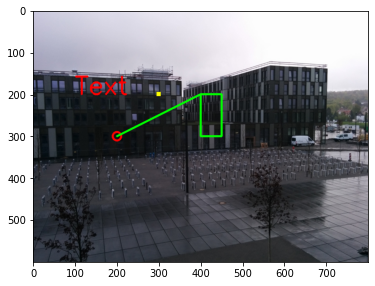

In [11]:
%matplotlib inline

img = img_color.copy()

# Kreis auf das Bild zeichnen
center = (200, 300)
radius = 10
color = (0, 0, 255)
line_thickness = 3 # -1 würde den Kreis ausfüllen
cv.circle(img, center, radius, color, line_thickness);

# Pixelfarben ändern
for i in range(195, 205):
    for j in range(295, 305):
        img[i, j] = (0, 255, 255)

# Linie zeichnen
pixel_from = (200, 300)
pixel_to = (400, 200)
color = (0, 255, 0)
line_thickness = 3
cv.line(img, pixel_from, pixel_to, color, line_thickness)

# Rechteck zeichnen
pixel_rect_top_left = (400, 200)
pixel_rect_bottom_right = (450, 300)
color = (0, 255, 0)
line_thickness = 3
cv.rectangle(img, pixel_rect_top_left, pixel_rect_bottom_right, color, line_thickness)

# Text einfügen
pixel_text_top_left = (100, 200)
color = (0, 0, 255)
font_size_multiplier = 2
line_thickness = 3
cv.putText(img, 'Text', pixel_text_top_left, cv.FONT_HERSHEY_SIMPLEX, font_size_multiplier, color, line_thickness)

fig = plt.figure(figsize=(6, 6))
_ = plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

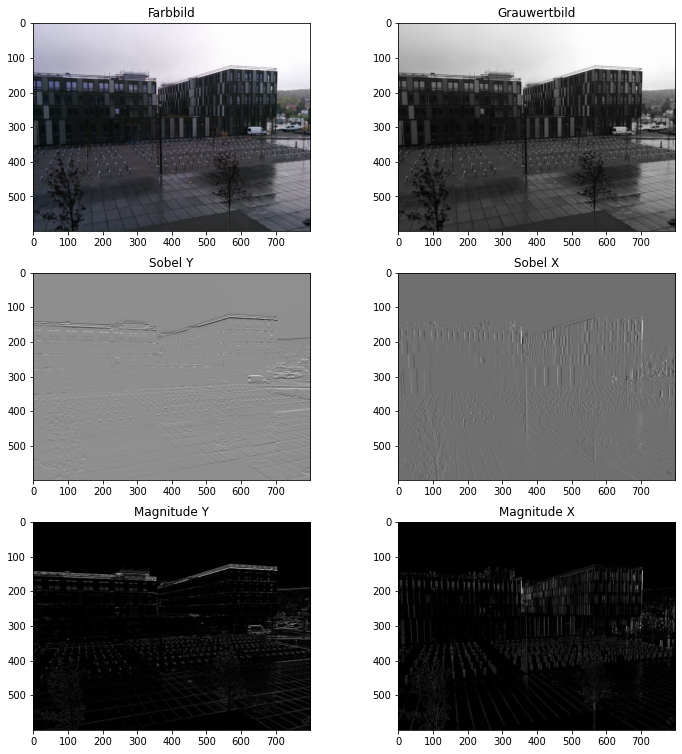

In [12]:
%matplotlib inline

img = img_color.copy()

# Farbbild in Grauwertbild konvertieren (convert to grayscale image)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Sobel und Magnitude Bild in Y-Richtung erstellen (create sobel and magnitude images in y-direction)
sobelImgY = cv.Sobel(gray.astype(np.float32), cv.CV_32FC1, 0, 1)
imgMaxY = np.absolute(sobelImgY)
sobelImgY = cv.normalize(sobelImgY, sobelImgY, 0, 255, cv.NORM_MINMAX)
imgMaxY = cv.normalize(imgMaxY, imgMaxY, 0, 255, cv.NORM_MINMAX)
sobelImgY = sobelImgY.astype(np.uint8)
imgMaxY = imgMaxY.astype(np.uint8)

# Sobel und Magnitude Bild in X-Richtung erstellen (create sobel and magnitude images in x-direction)
sobelImgX = cv.Sobel(gray.astype(np.float32), cv.CV_32FC1, 1, 0)
imgMaxX = np.absolute(sobelImgX)
sobelImgX = cv.normalize(sobelImgX, sobelImgX, 0, 255, cv.NORM_MINMAX)
imgMaxX = cv.normalize(imgMaxX, imgMaxX, 0, 255, cv.NORM_MINMAX)
sobelImgX = sobelImgX.astype(np.uint8)
imgMaxX = imgMaxX.astype(np.uint8)

# anzeigen
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
_ = axs[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
_ = axs[0, 0].set_title('Farbbild')
_ = axs[0, 1].imshow(gray, cmap='gray')
_ = axs[0, 1].set_title('Grauwertbild')
_ = axs[1, 0].imshow(sobelImgY, cmap='gray')
_ = axs[1, 0].set_title('Sobel Y')
_ = axs[1, 1].imshow(sobelImgX, cmap='gray')
_ = axs[1, 1].set_title('Sobel X')
_ = axs[2, 0].imshow(imgMaxY, cmap='gray')
_ = axs[2, 0].set_title('Magnitude Y')
_ = axs[2, 1].imshow(imgMaxX, cmap='gray')
_ = axs[2, 1].set_title('Magnitude X')